# Loan Default Prediction Utilizing Random Forest and Gradient Boosting

###### By
    John-Eric Bonilla

###### Date
    April 23, 2022

###### Purpose
    Daily Data Science Practice 

Import Project Dependencies for statistical processing, data processing, and visualizations.

In [30]:
import numpy as np
import pandas as pd
import os
import scipy.stats as scs
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as bs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.ensemble import IsolationForest
import tensorflow as tf
print(tf.__version__)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import math
#Plotly for interactive Viz
from plotly import __version__
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__)  # requires version >= 1.9.0
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

# Enhance practicle & visual appeal of this notebook
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

2.8.0
5.5.0


###### Data Source:

Name: I-Cheng Yeh
* email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw
* institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.
* other contact information: 886-2-26215656 ext. 3181

* Data Set Information:

* This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

###### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as * explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

    X6 = the repayment status in September, 2005;
    X7 = the * repayment status in August, 2005; . . .;
    X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one * * month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill * * * statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


###### Read in dataset

In [2]:
df = pd.read_csv('defaultcreditcardclients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###### Check for nulls, missing and duplicate values

In [3]:
#Check for duplicates 
dups = df.duplicated().sum()
print(f'There are {dups} duplicates in this dataset.')

There are 0 duplicates in this dataset.


In [4]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.keys

<bound method NDFrame.keys of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BI

###### Check for percentage of default clients

In [6]:
t_records = df.shape[0]
default = df[df['default payment next month'] == 1].shape[0]
no_default = df[df['default payment next month'] == 0].shape[0]
perc_grt = (default / t_records) * 100
print(
    f'The rows total {t_records}.\nThere are {default} people who defaulted on thier loans.\nThere are {no_default} individules who did NOT default on thier loans.\nAnd the percentage of people who defaulted are {perc_grt}%'
)

The rows total 30000.
There are 6636 people who defaulted on thier loans.
There are 23364 individules who did NOT default on thier loans.
And the percentage of people who defaulted are 22.12%


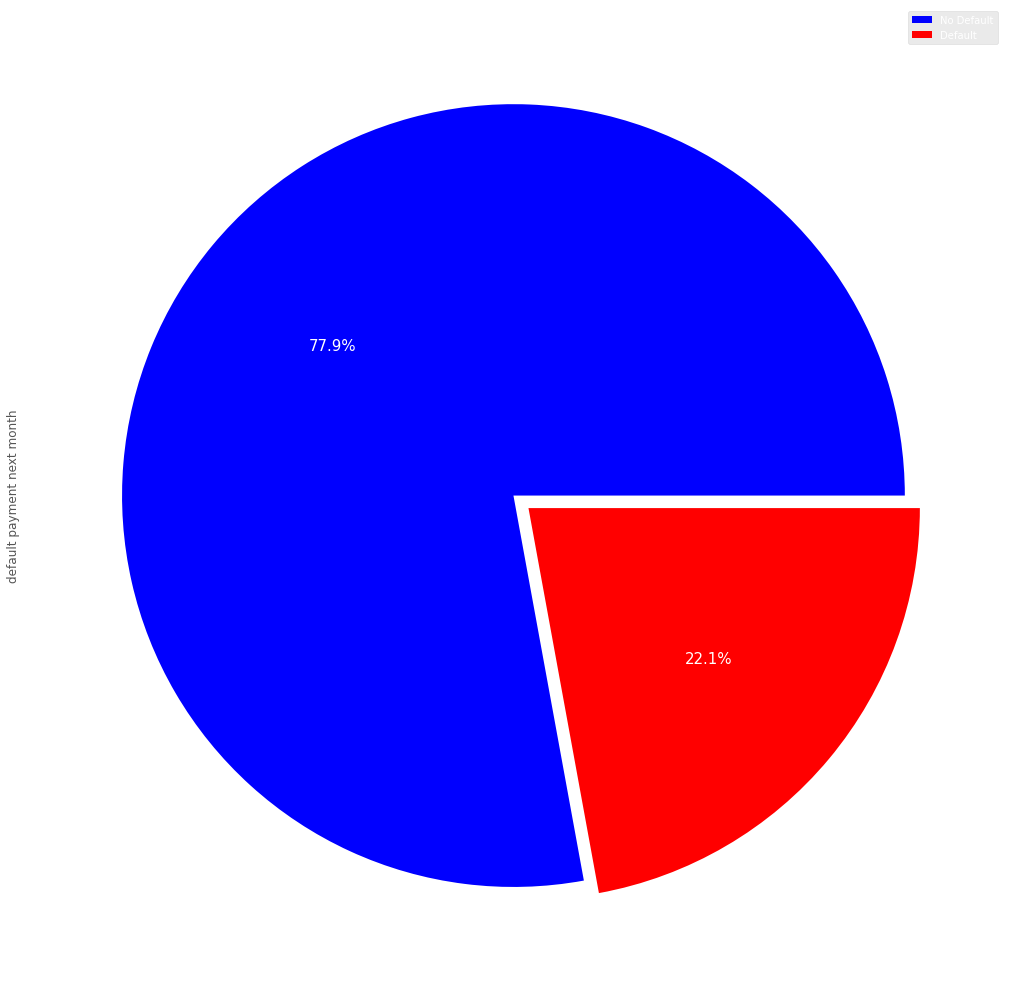

In [23]:
plt.figure(figsize=(18,18))

df['default payment next month'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','red'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

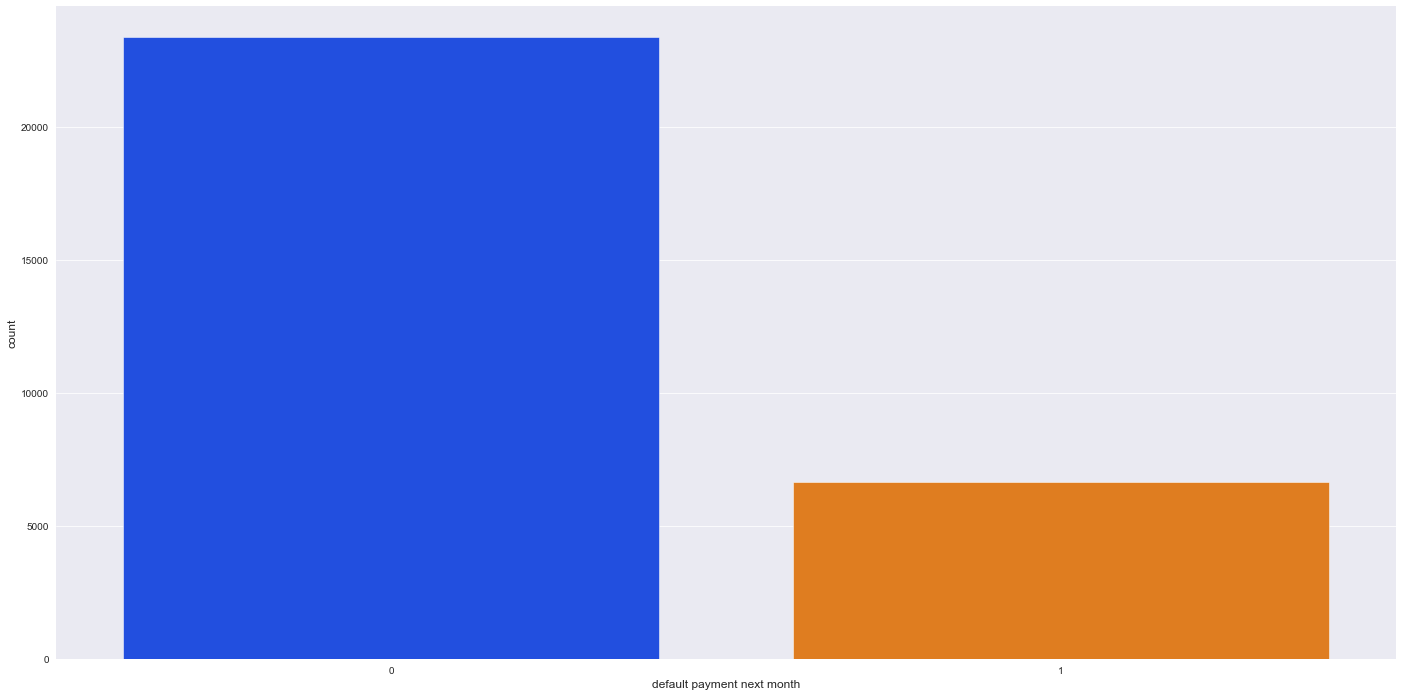

In [20]:
plt.figure(figsize=(24,12))
sns.set_style('darkgrid')
sns.countplot(x='default payment next month',data=df,palette='bright')
sns.despine(left=True, bottom=True)

###### Next we will examine the overall dataset

In [25]:
df['default payment next month'].groupby(df['SEX']).value_counts(normalize = True)

SEX  default payment next month
1    0                             0.758328
     1                             0.241672
2    0                             0.792237
     1                             0.207763
Name: default payment next month, dtype: float64

In [26]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
df['default payment next month'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  default payment next month
0          0                             1.000000
1          0                             0.807652
           1                             0.192348
2          0                             0.762651
           1                             0.237349
3          0                             0.748424
           1                             0.251576
4          0                             0.943089
           1                             0.056911
5          0                             0.935714
           1                             0.064286
6          0                             0.843137
           1                             0.156863
Name: default payment next month, dtype: float64

In [22]:
fig = px.scatter(df,
                 x="LIMIT_BAL",
                 y="EDUCATION",
                 size="LIMIT_BAL",
                 color="default payment next month",
                 hover_name="MARRIAGE",
                 log_x=True,
                 size_max=60)
fig.show()

In [26]:
dfcor = df.corr()
print(df.corr)

<bound method DataFrame.corr of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  

In [28]:
fig = px.imshow(dfcor, text_auto=True, aspect="auto",width=2000, height=800)
fig.show()

In [ ]:
plt.figure(figsize=[18,18])
sns.heatmap(data=cor_matrix, cmap='ksv', annot=True, fmt='.2g')

In [ ]:
plt.figure(figsize=(10,10))
g = sns.PairGrid(df, palette='bright')
g.map_diag(sns.distplot, color='red')
g.map_upper(plt.scatter, color='blue')
g.map_lower(sns.kdeplot, color='green')

###### Train-Test-split

In [12]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [13]:
print(len(df))

30000


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)


###### Data Normalization

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

###### Random Forest Model Formation

In [31]:
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_rf))

Test Accuracy:  0.8178333333333333


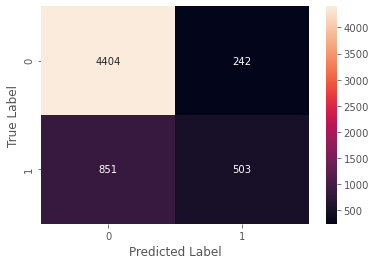

In [32]:
rf_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [35]:
print(metrics.classification_report(y_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4646
           1       0.68      0.37      0.48      1354

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



ROC_AUC:  0.7749295625086238


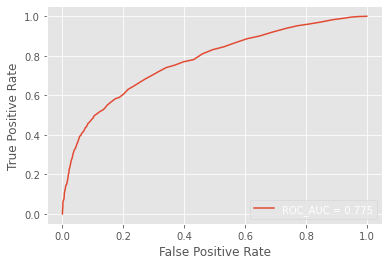

In [43]:
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

###### Next we will run the predictions utilizing the Gradient Boosting Model

In [45]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [46]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

[23:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [48]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [56]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.60%


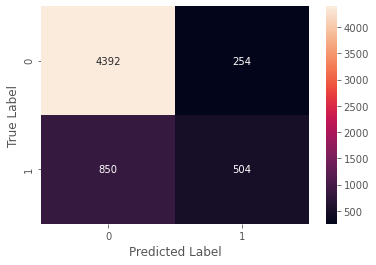

In [58]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()